In [1]:
import numpy as np
import pandas as pd

import re

import sys
sys.path.append('../')
from lib.Dab import Dab, get_linear_weights
from lib.Gmt import read_gmt

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
%%time
d = Dab('../data/global.dab')

CPU times: user 5.1 s, sys: 2.34 s, total: 7.44 s
Wall time: 7.43 s


In [3]:
from lib.clustering import *

In [4]:
def read_csv(file_name):
    return pd.DataFrame.from_csv(file_name, sep='\t', index_col=None)

Get the average performance on Rand Index and modularity across all test cases

In [5]:
def plot_metric(res, group, metric, order):
    g = res.groupby([group]).agg({metric: [np.mean, np.std]})
    g.columns = g.columns.droplevel(0)
    order = [o for o in order if o in g.index]
    
    g = g.transpose()[order].transpose()

    g.plot.bar(y='mean', yerr='std')

In [6]:
def transform_order(max_size=2600):
    return ['KNN(%d)' % s for s in 10,50,100, 250, 500, 1000 if s < max_size] + \
           ['Cosine', 'Pearson', 'Spearman', 'Topological Overlap', 'Log', 'None']

In [7]:
cluster_order = ['Greedy Modularity', 'Infomap', 'Label Propagation', 'Leading Eigenvector', 'Louvain', 'Walkttrap']


In [8]:
res = pd.DataFrame()
f = read_csv('../clustering_tests/gobp_clustering.tsv')
f = f.append(read_csv('../clustering_tests/gocc_clustering.tsv'))
f['test_size'] = [int(t.split(' ')[2]) for t in f['test_case']]
f['test_type'] = [t.split(' ')[1] for t in f['test_case']]
f['test_terms'] = [t.split(' ')[3] for t in f['test_case']]
res = res.append(f)
f = read_csv('../clustering_tests/gobp_clustering_cutoff.tsv')
f = f.append(read_csv('../clustering_tests/gocc_clustering_cutoff.tsv'))
f['cutoff'] = [float(re.search('Cutoff\((.+)\)', t).group(1)) for t in f['transform']]
f['transform'] = [t.split('>')[0].strip() for t in f['transform']]
f['test_size'] = [int(t.split(' ')[2]) for t in f['test_case']]
f['test_type'] = [t.split(' ')[1] for t in f['test_case']]
f['test_terms'] = [t.split(' ')[3] for t in f['test_case']]
res_cutoff = f

In [180]:
res_random = read_csv('../clustering_tests/random_clustering_cutoff.tsv')
res_random['test_size'] = [int(t.split(' ')[0]) for t in res_random['test_case']]
res_random['cutoff'] = [float(re.search('Cutoff\((.+)\)', t).group(1)) for t in res_random['transform']]
res_random['transform'] = [t.split('>')[0].strip() for t in res_random['transform']]

## Performance with Louvain Clustering across different transforms

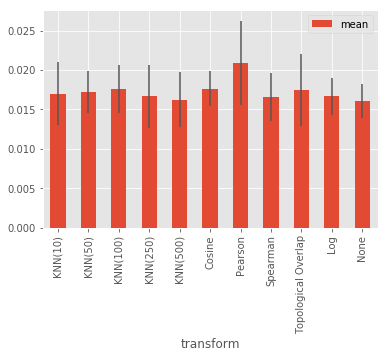

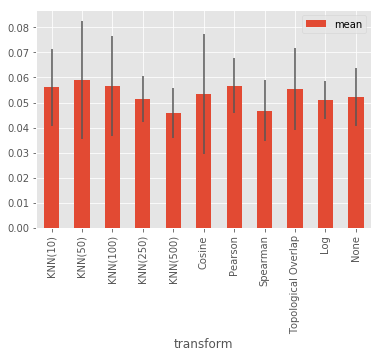

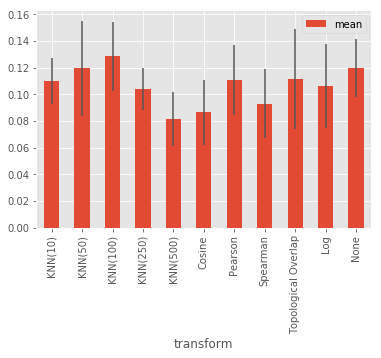

In [66]:
plot_metric(res_cutoff.query('test_case == "GO BP 1000 small" & cluster_alg == "Louvain"'),
            'transform', 'adjusted_rand', transform_order(1000))
plt.show()
plot_metric(res_cutoff.query('test_case == "GO BP 1000 medium" & cluster_alg == "Louvain"'),
            'transform', 'adjusted_rand', transform_order(1000))
plt.show()
plot_metric(res_cutoff.query('test_case == "GO BP 1000 large" & cluster_alg == "Louvain"'),
            'transform', 'adjusted_rand', transform_order(1000))
plt.show()

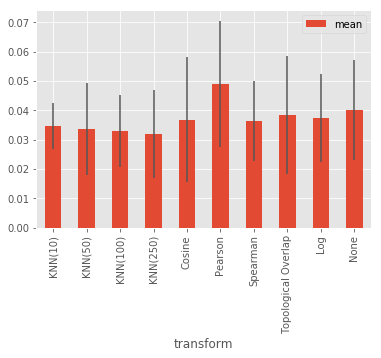

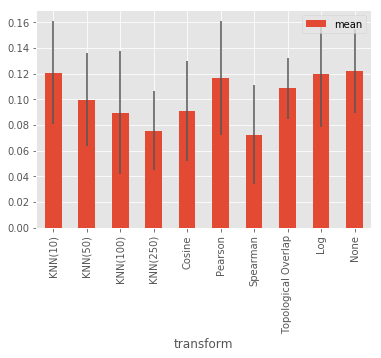

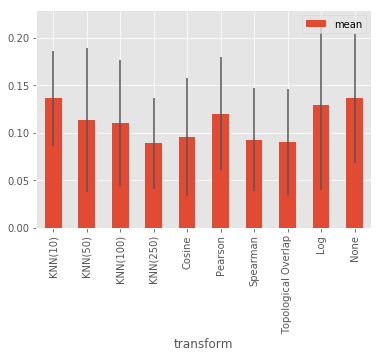

In [67]:
plot_metric(res_cutoff.query('test_case == "GO BP 500 small" & cluster_alg == "Louvain"'),
            'transform', 'adjusted_rand', transform_order(500))
plt.show()
plot_metric(res_cutoff.query('test_case == "GO BP 500 medium" & cluster_alg == "Louvain"'),
            'transform', 'adjusted_rand', transform_order(500))
plt.show()
plot_metric(res_cutoff.query('test_case == "GO BP 500 large" & cluster_alg == "Louvain"'),
            'transform', 'adjusted_rand', transform_order(500))
plt.show()

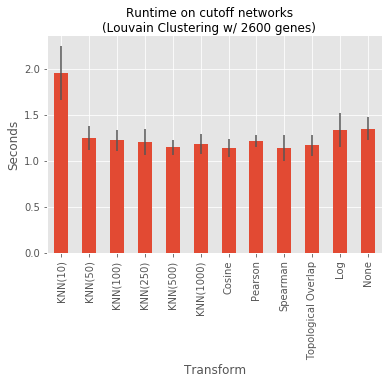

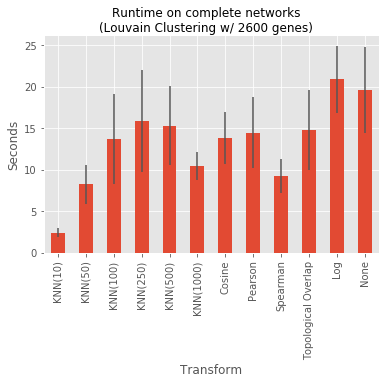

In [110]:
plot_metric(res_cutoff.query('test_size == 2600 & cluster_alg == "Louvain"'),
            'transform', 'seconds', transform_order())
plt.legend().remove()
plt.xlabel("Transform")
plt.ylabel("Seconds")
plt.suptitle("Runtime on cutoff networks\n(Louvain Clustering w/ 2600 genes)")
plt.show()

plot_metric(res.query('test_size == 2600 & cluster_alg == "Louvain"'),
            'transform', 'seconds', transform_order())
plt.legend().remove()
plt.xlabel("Transform")
plt.ylabel("Seconds")
plt.suptitle("Runtime on complete networks\n(Louvain Clustering w/ 2600 genes)")
plt.show()

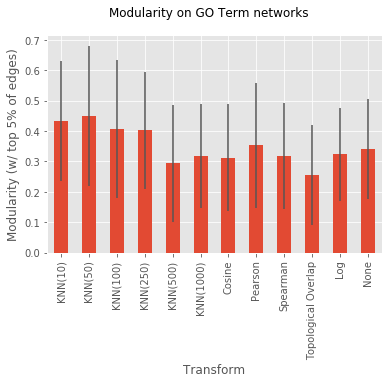

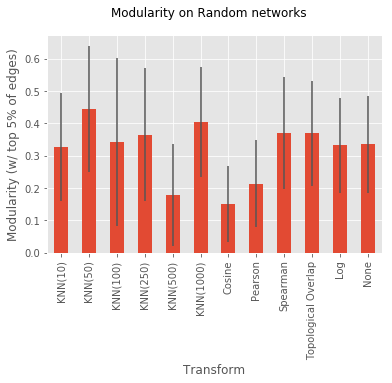

In [182]:
plot_metric(res_cutoff,
            'transform', 'transformed_modularity_cutoff', transform_order())
plt.legend().remove()
plt.xlabel("Transform")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on GO Term networks")
plt.show()

plot_metric(res_random,
            'transform', 'transformed_modularity_cutoff', transform_order())
plt.legend().remove()
plt.xlabel("Transform")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on Random networks")
plt.show()

In [179]:
res_random

test_case  test_number                        transform  \
0      100 Random Genes          1.0              Pearson > Cutoff(5)   
1      100 Random Genes          1.0              Pearson > Cutoff(5)   
2      100 Random Genes          1.0              Pearson > Cutoff(5)   
3      100 Random Genes          1.0              Pearson > Cutoff(5)   
4      100 Random Genes          1.0              Pearson > Cutoff(5)   
5      100 Random Genes          1.0              Pearson > Cutoff(5)   
6      100 Random Genes          1.0              Pearson > Cutoff(5)   
7      100 Random Genes          1.0             Spearman > Cutoff(5)   
8      100 Random Genes          1.0             Spearman > Cutoff(5)   
9      100 Random Genes          1.0             Spearman > Cutoff(5)   
10     100 Random Genes          1.0             Spearman > Cutoff(5)   
11     100 Random Genes          1.0             Spearman > Cutoff(5)   
12     100 Random Genes          1.0             Spearman > Cutoff(5)   
13     100 Random Genes          1.0             Spearman > Cutoff(5)   
14     100 Random Genes          1.0               Cosine > Cutoff(5)   
15     100 Random Genes          1.0               Cosine > Cutoff(5)   
16     100 Random Genes          1.0               Cosine > Cutoff(5)   
17     100 Random Genes          1.0               Cosine > Cutoff(5)   
18     100 Random Genes          1.0               Cosine > Cutoff(5)   
19     100 Random Genes          1.0               Cosine > Cutoff(5)   
20     100 Random Genes          1.0               Cosine > Cutoff(5)   
21     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
22     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
23     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
24     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
25     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
26     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
27     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
28     100 Random Genes          1.0              KNN(50) > Cutoff(5)   
29     100 Random Genes          1.0              KNN(50) > Cutoff(5)   
...                 ...          ...                              ...   
1382  2600 Random Genes          5.0             KNN(500) > Cutoff(5)   
1383  2600 Random Genes          5.0             KNN(500) > Cutoff(5)   
1384  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1385  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1386  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1387  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1388  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1389  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1390  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1391  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1392  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1393  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1394  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1395  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1396  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1397  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1398  2600 Random Genes          5.0                 None > Cutoff(5)   
1399  2600 Random Genes          5.0                 None > Cutoff(5)   
1400  2600 Random Genes          5.0                 None > Cutoff(5)   
1401  2600 Random Genes          5.0                 None > Cutoff(5)   
1402  2600 Random Genes          5.0                 None > Cutoff(5)   
1403  2600 Random Genes          5.0                 None > Cutoff(5)   
1404  2600 Random Genes          5.0                 None > Cutoff(5)   

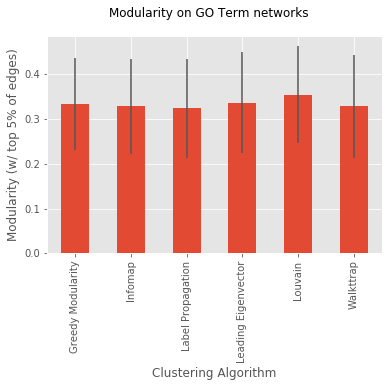

In [102]:
plot_metric(res_cutoff,
            'cluster_alg', 'modularity_cutoff', cluster_order)
plt.legend().remove()
plt.xlabel("Clustering Algorithm")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on GO Term networks")
plt.show()

plot_metric(res_random,
            'cluster_alg', 'modularity_cutoff', cluster_order)
plt.legend().remove()
plt.xlabel("Clustering Algorithm")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on Random networks")
plt.show()

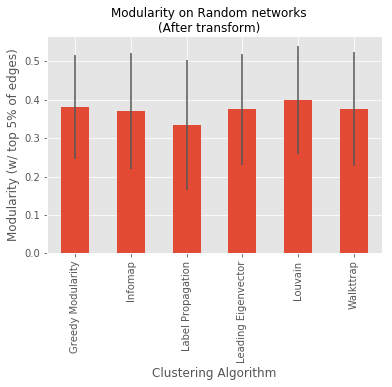

In [109]:
plot_metric(res_cutoff,
            'cluster_alg', 'transformed_modularity_cutoff', cluster_order)
plt.legend().remove()
plt.xlabel("Clustering Algorithm")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on GO Term networks\n(After transform)")
plt.show()

plot_metric(res_random,
            'cluster_alg', 'transformed_modularity_cutoff', cluster_order)
plt.legend().remove()
plt.xlabel("Clustering Algorithm")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on Random networks\n(After transform)")
plt.show()

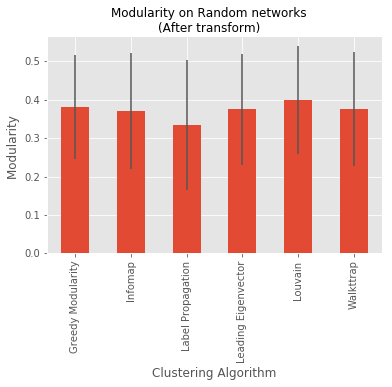

In [144]:
plot_metric(res_cutoff,
            'cluster_alg', 'transformed_modularity', cluster_order)
plt.legend().remove()
plt.xlabel("Clustering Algorithm")
plt.ylabel("Modularity ")
plt.suptitle("Modularity on GO Term networks\n(After transform)")
plt.show()

plot_metric(res_random,
            'cluster_alg', 'transformed_modularity', cluster_order)
plt.legend().remove()
plt.xlabel("Clustering Algorithm")
plt.ylabel("Modularity ")
plt.suptitle("Modularity on Random networks\n(After transform)")
plt.show()

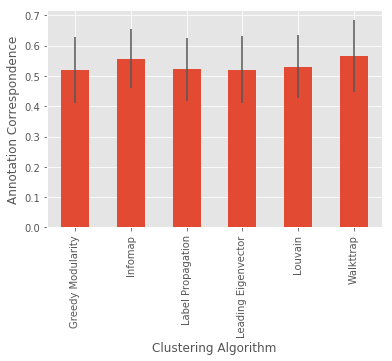

In [92]:
plot_metric(res_cutoff[res_cutoff.test_case == 'GO BP 500 large'],
            'cluster_alg', 'annotation_correspondence', cluster_order)
plt.legend().remove()
plt.xlabel("Clustering Algorithm")
plt.ylabel("Annotation Correspondence")
plt.show()

plot_metric(res_cutoff[res_cutoff.test_case == 'GO BP 500 large'],
            'cluster_alg', 'adjusted_rand', cluster_order)
plt.legend().remove()
plt.xlabel("Clustering Algorithm")
plt.ylabel("Adjusted Rand Index")
plt.show()

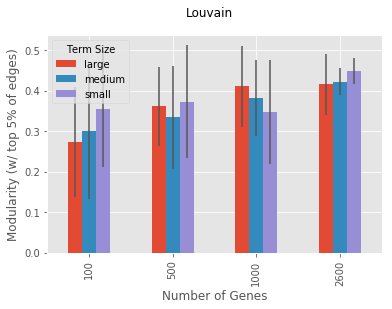

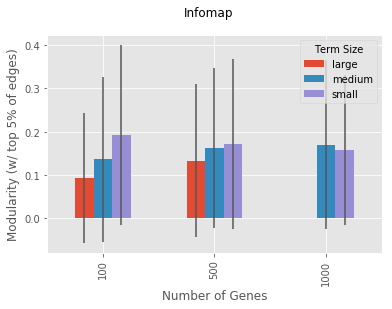

In [126]:
def graph_modularity_sizes(alg):
    g = res[res.cluster_alg == alg].groupby(['test_size', 'test_terms'])
    mean = g.mean()
    std = g.std()
    mean = pd.pivot_table(mean.reset_index(), columns='test_terms', index='test_size', values='modularity_cutoff')
    std = pd.pivot_table(std.reset_index(), columns='test_terms', index='test_size', values='modularity_cutoff')
    mean.plot.bar(yerr=std)
    plt.legend().set_title("Term Size")
    plt.xlabel("Number of Genes")
    plt.ylabel("Modularity (w/ top 5% of edges)")
    plt.suptitle(alg)
    plt.show()
graph_modularity_sizes('Louvain')
graph_modularity_sizes('Walkttrap')
graph_modularity_sizes('Infomap')
graph_modularity_sizes('Greedy Modularity')
graph_modularity_sizes('Label Propagation')
graph_modularity_sizes('Leading Eigenvector')

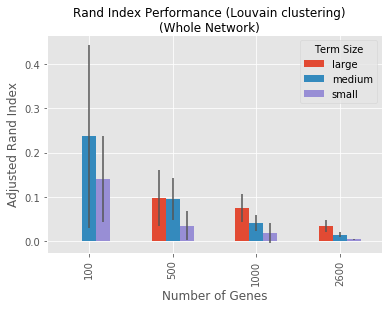

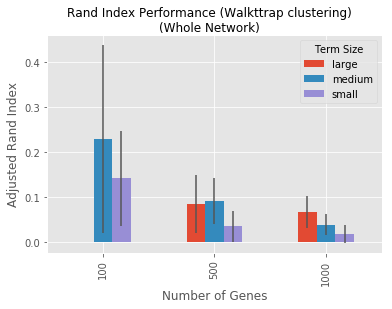

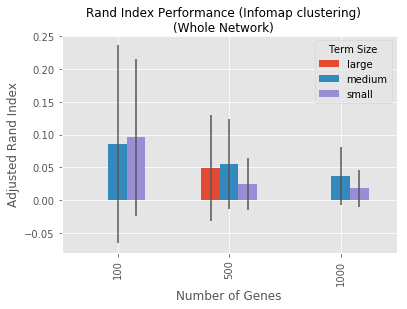

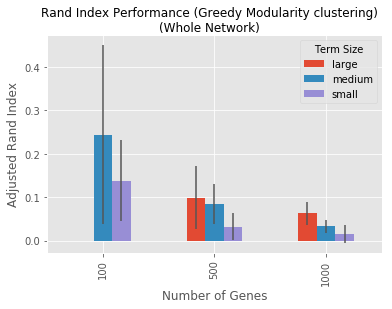

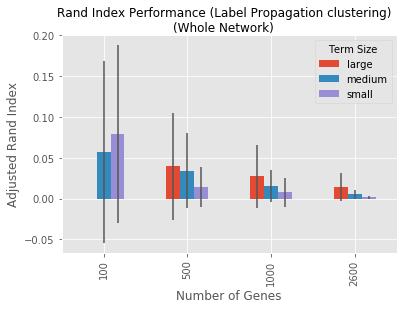

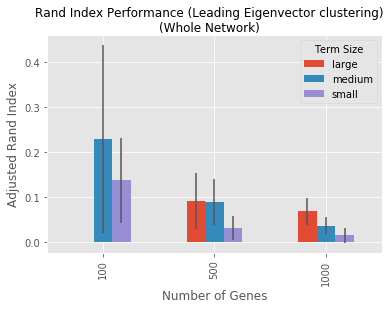

In [152]:
def graph_rand_sizes(alg):
    g = res[res.cluster_alg == alg].groupby(['test_size', 'test_terms'])
    mean = g.mean()
    std = g.std()
    mean = pd.pivot_table(mean.reset_index(), columns='test_terms', index='test_size', values='adjusted_rand')
    std = pd.pivot_table(std.reset_index(), columns='test_terms', index='test_size', values='adjusted_rand')
    mean.plot.bar(yerr=std)
    plt.legend().set_title("Term Size")
    plt.xlabel("Number of Genes")
    plt.ylabel("Adjusted Rand Index")
    plt.suptitle("Rand Index Performance (%s clustering)\n(Whole Network)" % alg)
    plt.show()
graph_rand_sizes('Louvain')
graph_rand_sizes('Walkttrap')
graph_rand_sizes('Infomap')
graph_rand_sizes('Greedy Modularity')
graph_rand_sizes('Label Propagation')
graph_rand_sizes('Leading Eigenvector')

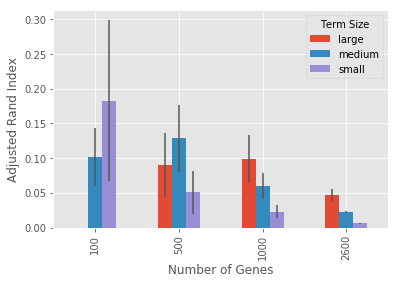

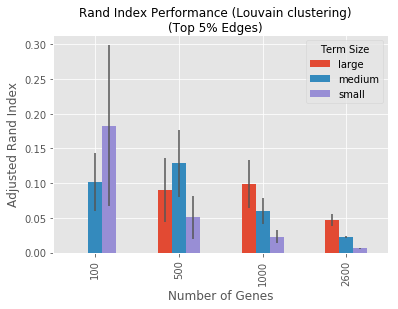

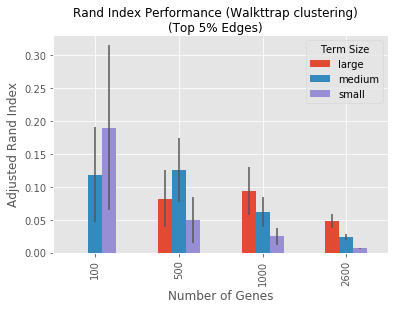

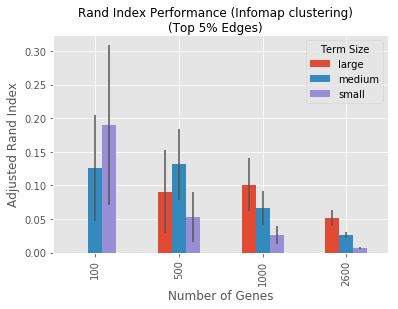

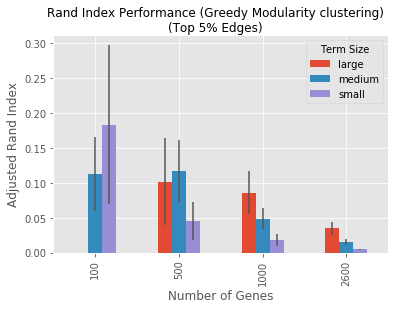

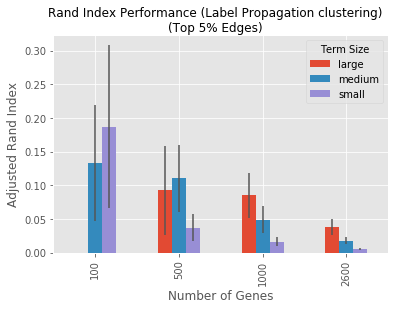

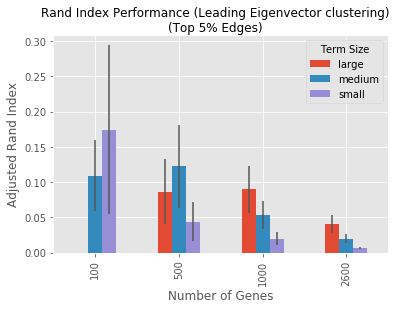

In [154]:
def graph_rand_sizes_cutoff(alg):
    g = res_cutoff[res_cutoff.cluster_alg == alg].groupby(['test_size', 'test_terms'])
    mean = g.mean()
    std = g.std()
    mean = pd.pivot_table(mean.reset_index(), columns='test_terms', index='test_size', values='adjusted_rand')
    std = pd.pivot_table(std.reset_index(), columns='test_terms', index='test_size', values='adjusted_rand')
    mean.plot.bar(yerr=std)
    plt.legend().set_title("Term Size")
    plt.xlabel("Number of Genes")
    plt.ylabel("Adjusted Rand Index")
    plt.suptitle("Rand Index Performance (%s clustering)\n(Top 5%% Edges)" % alg)
    plt.show()
graph_rand_sizes_cutoff('Louvain')
graph_rand_sizes_cutoff('Walkttrap')
graph_rand_sizes_cutoff('Infomap')
graph_rand_sizes_cutoff('Greedy Modularity')
graph_rand_sizes_cutoff('Label Propagation')
graph_rand_sizes_cutoff('Leading Eigenvector')

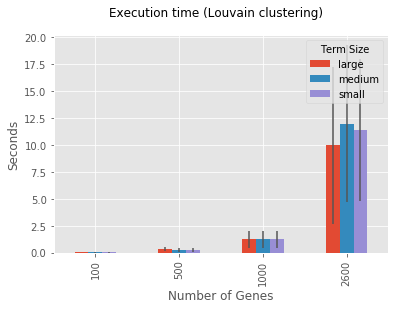

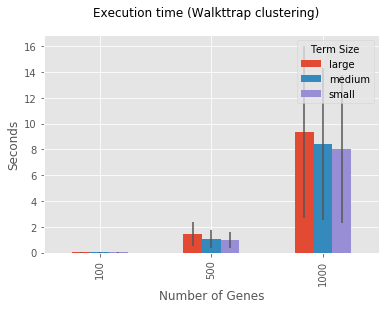

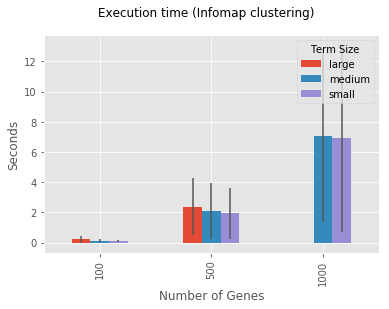

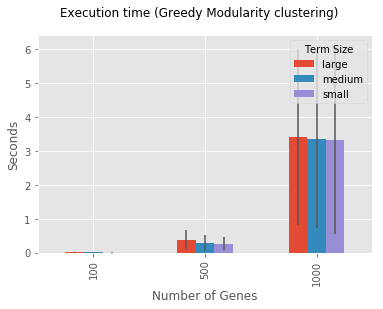

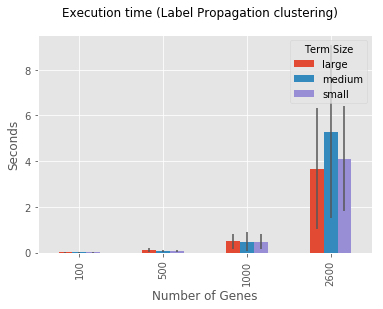

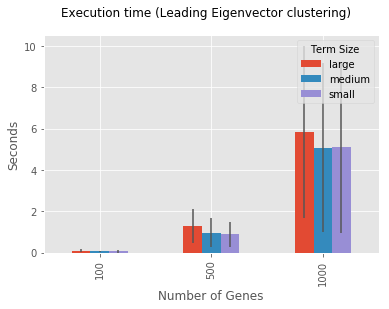

In [11]:
def graph_time(alg):
    g = res[res.cluster_alg == alg].groupby(['test_size', 'test_terms'])
    mean = g.mean()
    std = g.std()
    mean = pd.pivot_table(mean.reset_index(), columns='test_terms', index='test_size', values='seconds')
    std = pd.pivot_table(std.reset_index(), columns='test_terms', index='test_size', values='seconds')
    mean.plot.bar(yerr=std)
    plt.legend().set_title("Term Size")
    plt.xlabel("Number of Genes")
    plt.ylabel("Seconds")
    plt.suptitle("Execution time (%s clustering)" % alg)
    plt.show()
graph_time('Louvain')
graph_time('Walkttrap')
graph_time('Infomap')
graph_time('Greedy Modularity')
graph_time('Label Propagation')
graph_time('Leading Eigenvector')

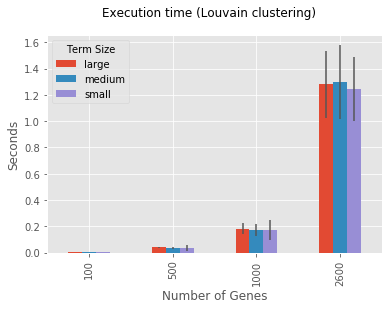

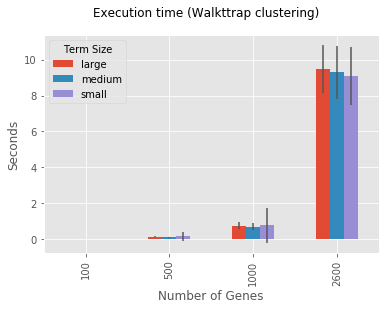

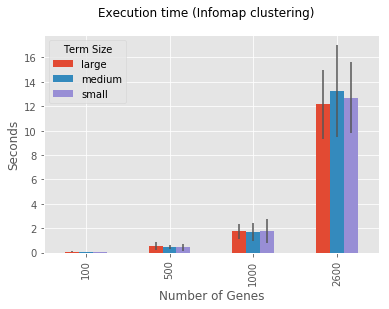

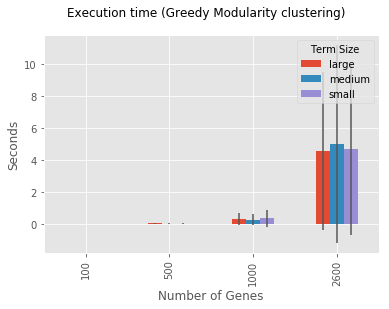

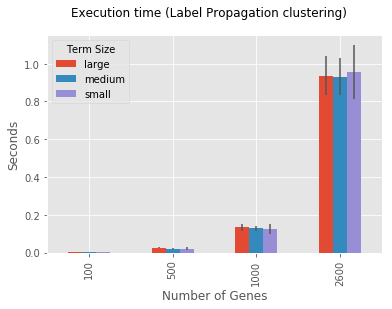

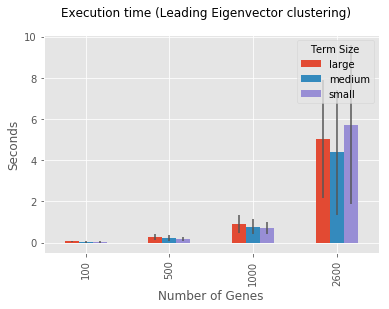

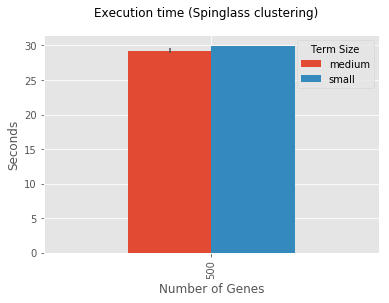

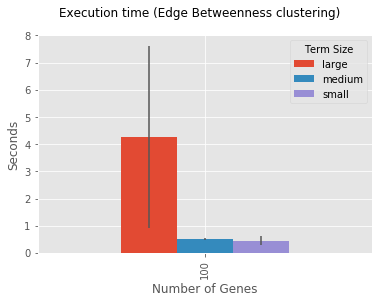

In [41]:
def graph_time_cutoff(alg):
    g = res_cutoff[res_cutoff.cluster_alg == alg].groupby(['test_size', 'test_terms'])
    mean = g.mean()
    std = g.std()
    mean = pd.pivot_table(mean.reset_index(), columns='test_terms', index='test_size', values='seconds')
    std = pd.pivot_table(std.reset_index(), columns='test_terms', index='test_size', values='seconds')
    mean.plot.bar(yerr=std)
    plt.legend().set_title("Term Size")
    plt.xlabel("Number of Genes")
    plt.ylabel("Seconds")
    plt.suptitle("Execution time (%s clustering)" % alg)
    plt.show()
graph_time_cutoff('Louvain')
graph_time_cutoff('Walkttrap')
graph_time_cutoff('Infomap')
graph_time_cutoff('Greedy Modularity')
graph_time_cutoff('Label Propagation')
graph_time_cutoff('Leading Eigenvector')
graph_time_cutoff('Spinglass')
graph_time_cutoff('Edge Betweenness')

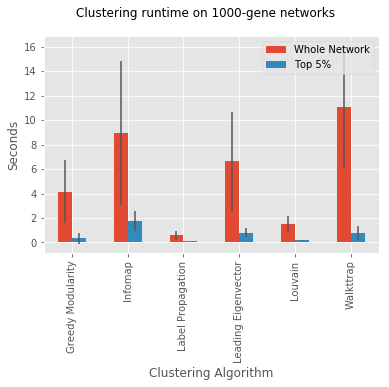

In [42]:
merging_columns = ['test_case', 'test_number', 'test_size', 'cluster_alg','transform']
merged_time = pd.merge(res[merging_columns + ['seconds']],
                       res_cutoff[merging_columns + ['seconds']],
                       on=merging_columns)
g = merged_time[(merged_time.test_size == 1000) &
                (merged_time.cluster_alg != 'None')].groupby(['cluster_alg'])
g_mean = g.mean().transpose()[cluster_order].transpose()
g_std = g.std().transpose()[cluster_order].transpose()
g_mean.plot.bar(y = ['seconds_x', 'seconds_y'], yerr=g_std[['seconds_x', 'seconds_y']])
plt.ylabel('Seconds')
plt.legend(['Whole Network', 'Top 5%'])
plt.xlabel('Clustering Algorithm')
plt.suptitle('Clustering runtime on 1000-gene networks')
plt.show()

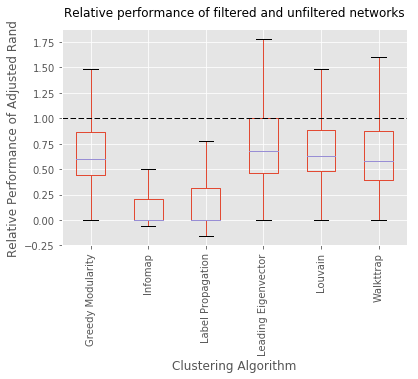

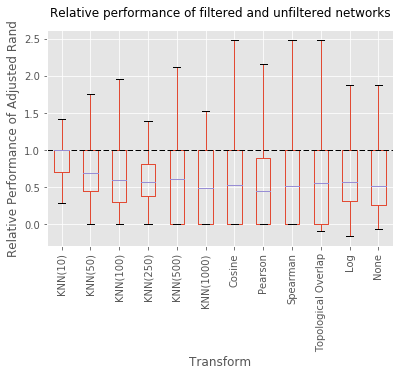

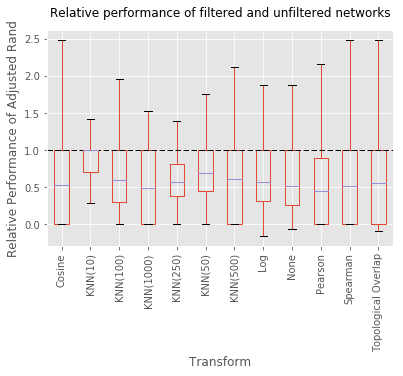

In [129]:
merging_columns = ['test_case', 'test_number', 'test_size', 'cluster_alg','transform']
merged_rand = pd.merge(res[merging_columns + ['adjusted_rand']],
                       res_cutoff[merging_columns + ['adjusted_rand']],
                       on=merging_columns)
merged_rand = merged_rand[(merged_rand.cluster_alg.isin(cluster_order))]
merged_rand['relative'] = merged_rand['adjusted_rand_x'] / merged_rand['adjusted_rand_y']
merged_rand.boxplot(column='relative', by='cluster_alg', showfliers=False)
plt.xticks(rotation=90)
plt.title("")
plt.suptitle("Relative performance of filtered and unfiltered networks")
plt.xlabel("Clustering Algorithm")
plt.ylabel("Relative Performance of Adjusted Rand")
plt.axhline(1, color='black', linewidth=1, ls='--')
plt.show()

merged_rand = pd.merge(res[merging_columns + ['adjusted_rand']],
                       res_cutoff[merging_columns + ['adjusted_rand']],
                       on=merging_columns)
merged_rand = merged_rand[merged_rand.transform.isin(transform_order())]
merged_rand['relative'] = merged_rand['adjusted_rand_x'] / merged_rand['adjusted_rand_y']
merged_rand['transform_index'] = [transform_order().index(t) for t in merged_rand.transform]
merged_rand.boxplot(column='relative', by='transform_index', showfliers=False)
plt.xticks(rotation=90)
plt.title("")
plt.suptitle("Relative performance of filtered and unfiltered networks")
plt.xlabel("Transform")
plt.ylabel("Relative Performance of Adjusted Rand")
plt.gca().set_xticklabels(transform_order())
plt.axhline(1, color='black', linewidth=1, ls='--')
plt.show()



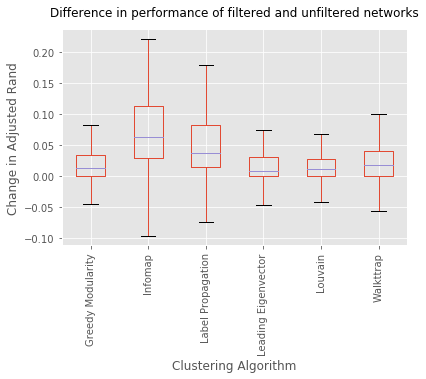

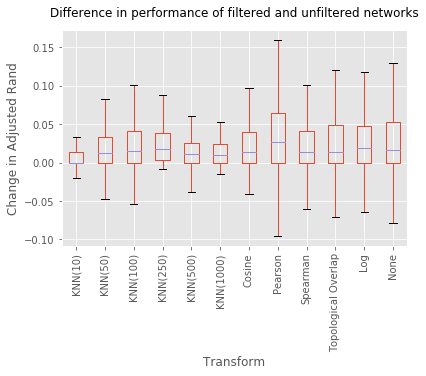

In [151]:
merging_columns = ['test_case', 'test_number', 'test_size', 'cluster_alg','transform']
merged_rand = pd.merge(res[merging_columns + ['adjusted_rand']],
                       res_cutoff[merging_columns + ['adjusted_rand']],
                       on=merging_columns)
merged_rand = merged_rand[(merged_rand.cluster_alg.isin(cluster_order))]
merged_rand['relative'] = merged_rand['adjusted_rand_y'] - merged_rand['adjusted_rand_x']
merged_rand.boxplot(column='relative', by='cluster_alg', showfliers=False)
plt.xticks(rotation=90)
plt.title("")
plt.suptitle("Difference in performance of filtered and unfiltered networks")
plt.xlabel("Clustering Algorithm")
plt.ylabel("Change in Adjusted Rand")
plt.show()

merged_rand = pd.merge(res[merging_columns + ['adjusted_rand']],
                       res_cutoff[merging_columns + ['adjusted_rand']],
                       on=merging_columns)
merged_rand = merged_rand[merged_rand.transform.isin(transform_order())]
merged_rand['relative'] = merged_rand['adjusted_rand_y'] - merged_rand['adjusted_rand_x']
merged_rand['transform_index'] = [transform_order().index(t) for t in merged_rand.transform]
merged_rand.boxplot(column='relative', by='transform_index', showfliers=False)
plt.xticks(rotation=90)
plt.title("")
plt.suptitle("Difference in performance of filtered and unfiltered networks")
plt.xlabel("Transform")
plt.ylabel("Change in Adjusted Rand")
plt.gca().set_xticklabels(transform_order())
plt.show()



In [147]:
g = res[res.cluster_alg == 'Louvain'].groupby(['test_size', 'test_terms'])
g_mean = pd.pivot_table(g.mean().reset_index(), columns='test_terms', index='test_size', values='annotation_correspondence')

g_mean.set_value(100,'large', 0)
g_mean



test_terms     large    medium     small
test_size                               
100         0.000000  0.722987  0.312050
500         0.339541  0.241403  0.077127
1000        0.223092  0.114317  0.048167
2600        0.101459  0.018505  0.003871

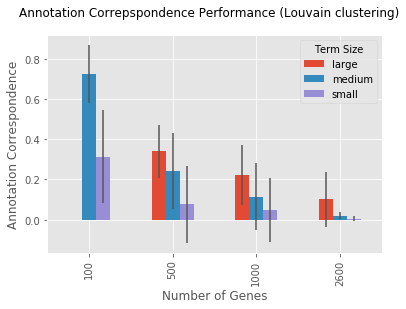

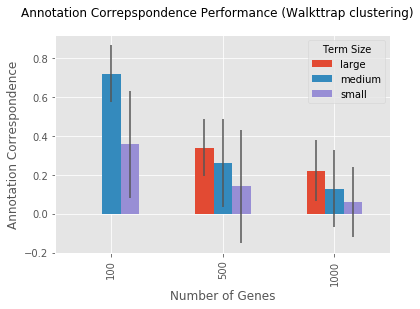

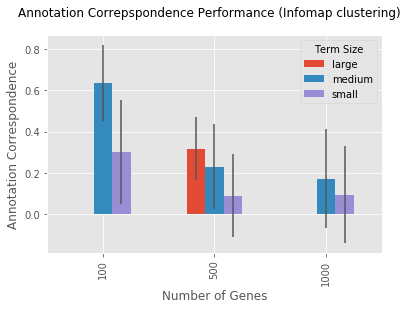

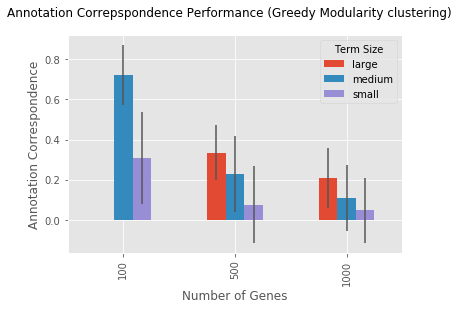

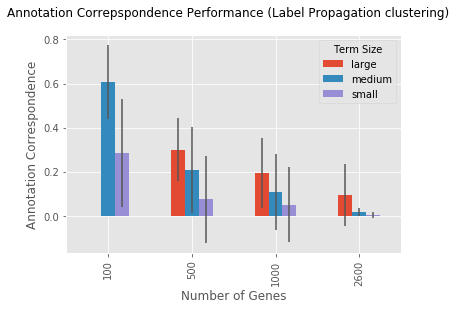

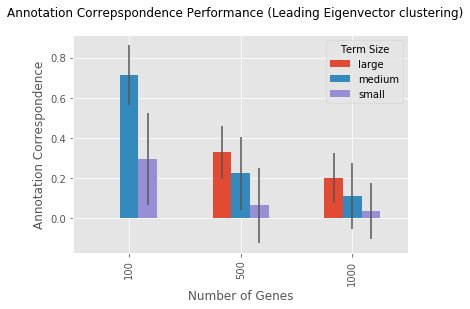

In [149]:
def graph_correspondence_sizes(alg):
    g = res[res.cluster_alg == alg].groupby(['test_size', 'test_terms'])
    mean = g.mean()
    std = g.std()
    mean = pd.pivot_table(mean.reset_index(), columns='test_terms', index='test_size', values='annotation_correspondence')
    mean.set_value(100, 'large', 0) 
    std = pd.pivot_table(std.reset_index(), columns='test_terms', index='test_size', values='annotation_correspondence')
    mean.plot.bar(yerr=std)
    plt.legend().set_title("Term Size")
    plt.xlabel("Number of Genes")
    plt.ylabel("Annotation Correspondence")
    plt.suptitle("Annotation Correpspondence Performance (%s clustering)" % alg)
    plt.show()
graph_correspondence_sizes('Louvain')
graph_correspondence_sizes('Walkttrap')
graph_correspondence_sizes('Infomap')
graph_correspondence_sizes('Greedy Modularity')
graph_correspondence_sizes('Label Propagation')
graph_correspondence_sizes('Leading Eigenvector')

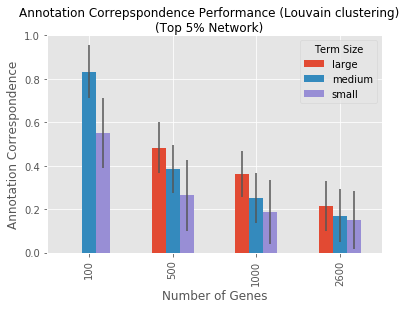

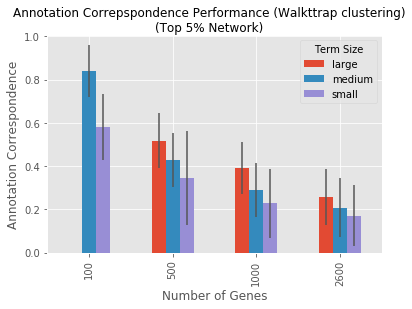

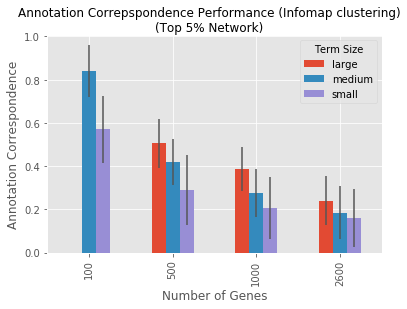

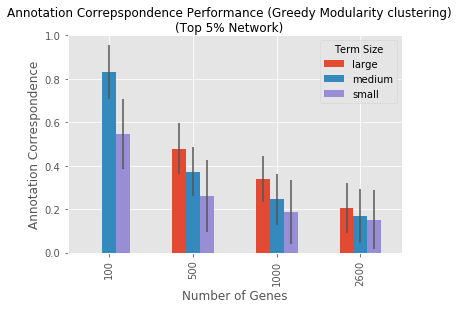

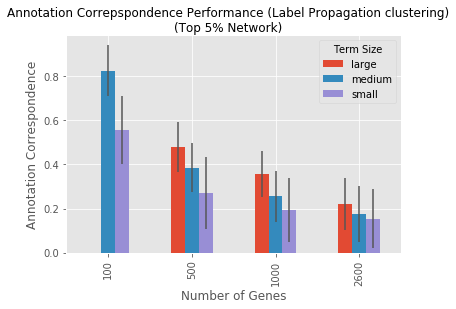

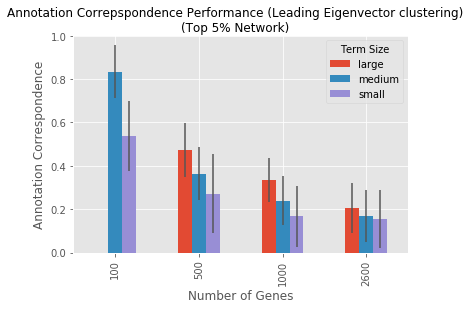

In [157]:
def graph_correspondence_sizes_cutoff(alg):
    g = res_cutoff[res_cutoff.cluster_alg == alg].groupby(['test_size', 'test_terms'])
    mean = g.mean()
    std = g.std()
    mean = pd.pivot_table(mean.reset_index(), columns='test_terms', index='test_size', values='annotation_correspondence')
    mean.set_value(100, 'large', 0) 
    std = pd.pivot_table(std.reset_index(), columns='test_terms', index='test_size', values='annotation_correspondence')
    mean.plot.bar(yerr=std)
    plt.legend().set_title("Term Size")
    plt.xlabel("Number of Genes")
    plt.ylabel("Annotation Correspondence")
    plt.suptitle("Annotation Correpspondence Performance (%s clustering)\n(Top 5%% Network)" % alg)
    plt.show()
graph_correspondence_sizes_cutoff('Louvain')
graph_correspondence_sizes_cutoff('Walkttrap')
graph_correspondence_sizes_cutoff('Infomap')
graph_correspondence_sizes_cutoff('Greedy Modularity')
graph_correspondence_sizes_cutoff('Label Propagation')
graph_correspondence_sizes_cutoff('Leading Eigenvector')

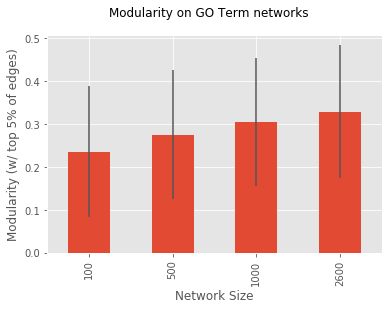

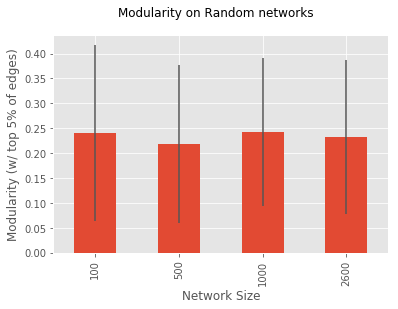

In [93]:
plot_metric(res_cutoff,
            'test_size', 'modularity_cutoff', [100,500,1000,2600])
plt.legend().remove()
plt.xlabel("Network Size")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on GO Term networks")
plt.show()

plot_metric(res_random,
            'test_size', 'modularity_cutoff', [100,500,1000,2600])
plt.legend().remove()
plt.xlabel("Network Size")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on Random networks")
plt.show()

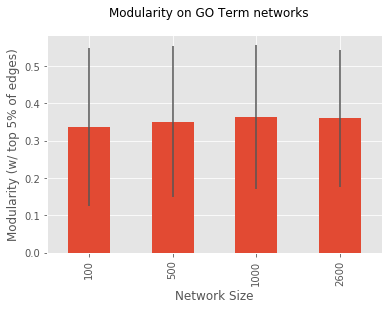

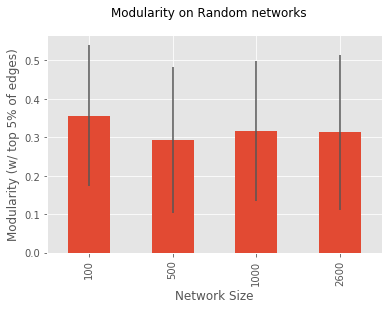

In [102]:
plot_metric(res_cutoff,
            'test_size', 'transformed_modularity_cutoff', [100,500,1000,2600])
plt.legend().remove()
plt.xlabel("Network Size")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on GO Term networks")
plt.show()

plot_metric(res_random,
            'test_size', 'transformed_modularity_cutoff', [100,500,1000,2600])
plt.legend().remove()
plt.xlabel("Network Size")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on Random networks")
plt.show()

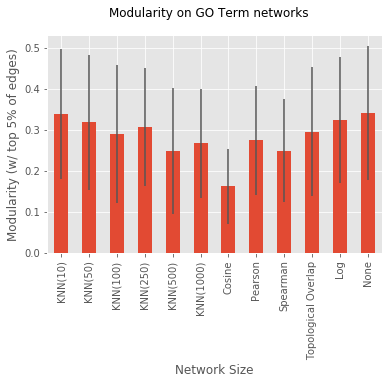

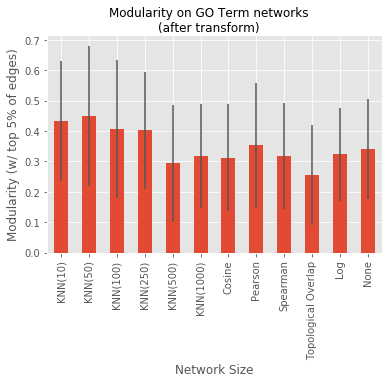

In [111]:
plot_metric(res_cutoff,
            'transform', 'modularity_cutoff', transform_order())
plt.legend().remove()
plt.xlabel("Network Size")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on GO Term networks\n(before transform)")
plt.show()

plot_metric(res_cutoff,
            'transform', 'transformed_modularity_cutoff', transform_order())
plt.legend().remove()
plt.xlabel("Network Size")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.suptitle("Modularity on GO Term networks\n(after transform)")
plt.show()


In [95]:
res_random

test_case  test_number                        transform  \
0      100 Random Genes          1.0              Pearson > Cutoff(5)   
1      100 Random Genes          1.0              Pearson > Cutoff(5)   
2      100 Random Genes          1.0              Pearson > Cutoff(5)   
3      100 Random Genes          1.0              Pearson > Cutoff(5)   
4      100 Random Genes          1.0              Pearson > Cutoff(5)   
5      100 Random Genes          1.0              Pearson > Cutoff(5)   
6      100 Random Genes          1.0              Pearson > Cutoff(5)   
7      100 Random Genes          1.0             Spearman > Cutoff(5)   
8      100 Random Genes          1.0             Spearman > Cutoff(5)   
9      100 Random Genes          1.0             Spearman > Cutoff(5)   
10     100 Random Genes          1.0             Spearman > Cutoff(5)   
11     100 Random Genes          1.0             Spearman > Cutoff(5)   
12     100 Random Genes          1.0             Spearman > Cutoff(5)   
13     100 Random Genes          1.0             Spearman > Cutoff(5)   
14     100 Random Genes          1.0               Cosine > Cutoff(5)   
15     100 Random Genes          1.0               Cosine > Cutoff(5)   
16     100 Random Genes          1.0               Cosine > Cutoff(5)   
17     100 Random Genes          1.0               Cosine > Cutoff(5)   
18     100 Random Genes          1.0               Cosine > Cutoff(5)   
19     100 Random Genes          1.0               Cosine > Cutoff(5)   
20     100 Random Genes          1.0               Cosine > Cutoff(5)   
21     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
22     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
23     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
24     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
25     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
26     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
27     100 Random Genes          1.0              KNN(10) > Cutoff(5)   
28     100 Random Genes          1.0              KNN(50) > Cutoff(5)   
29     100 Random Genes          1.0              KNN(50) > Cutoff(5)   
...                 ...          ...                              ...   
1382  2600 Random Genes          5.0             KNN(500) > Cutoff(5)   
1383  2600 Random Genes          5.0             KNN(500) > Cutoff(5)   
1384  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1385  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1386  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1387  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1388  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1389  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1390  2600 Random Genes          5.0            KNN(1000) > Cutoff(5)   
1391  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1392  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1393  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1394  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1395  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1396  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1397  2600 Random Genes          5.0  Topological Overlap > Cutoff(5)   
1398  2600 Random Genes          5.0                 None > Cutoff(5)   
1399  2600 Random Genes          5.0                 None > Cutoff(5)   
1400  2600 Random Genes          5.0                 None > Cutoff(5)   
1401  2600 Random Genes          5.0                 None > Cutoff(5)   
1402  2600 Random Genes          5.0                 None > Cutoff(5)   
1403  2600 Random Genes          5.0                 None > Cutoff(5)   
1404  2600 Random Genes          5.0                 None > Cutoff(5)   

In [87]:
res_cutoff.groupby(['cluster_alg']).count()

test_case  test_number  transform  seconds  \
cluster_alg                                                       
Edge Betweenness            12           12         12       12   
Greedy Modularity          720          720        720      720   
Infomap                    720          720        720      720   
Label Propagation          720          720        720      720   
Leading Eigenvector        633          633        633      633   
Louvain                    720          720        720      720   
None                       720          720        720      720   
Spinglass                    3            3          3        3   
Walkttrap                  720          720        720      720   

                     adjusted_rand  annotation_correspondence  n_clusters  \
cluster_alg                                                                 
Edge Betweenness                12                         12          12   
Greedy Modularity              720                        720         720   
Infomap                        720                        720         720   
Label Propagation              720                        720         720   
Leading Eigenvector            633                        633         633   
Louvain                        720                        720         720   
None                           666                        720         720   
Spinglass                        3                          3           3   
Walkttrap                      720                        720         720   

                     cluster_sizes  transformed_modularity  modularity  \
cluster_alg                                                              
Edge Betweenness                12                      12          12   
Greedy Modularity              720                     720         720   
Infomap                        720                     720         720   
Label Propagation              720                     720         720   
Leading Eigenvector            633                     633         633   
Louvain                        720                     720         720   
None                           720                     720         720   
Spinglass                        3                       3           3   
Walkttrap                      720                     720         720   

                     modularity_cutoff  transformed_modularity_cutoff  cutoff  \
cluster_alg                                                                     
Edge Betweenness                    12                             12      12   
Greedy Modularity                  720                            720     720   
Infomap                            720                            720     720   
Label Propagation                  720                            720     720   
Leading Eigenvector                633                            633     633   
Louvain                            720                            720     720   
None                               720                            720     720   
Spinglass                            3                              3       3   
Walkttrap                          720                            720     720   

                     test_size  test_type  test_terms  
cluster_alg                                            
Edge Betweenness            12         12          12  
Greedy Modularity          720        720         720  
Infomap                    720        720         720  
Label Propagation          720        720         720  
Leading Eigenvector        633        633         633  
Louvain                    720        720         720  
None                       720        720         720  
Spinglass                    3          3           3  
Walkttrap                  720        720         720

In [40]:
res = read_csv('../clustering_tests/gobp_clustering_cutoff.tsv')
#res = res.append(read_csv('../clustering_tests/gocc_clustering_cutoff.tsv'))
res['cutoff'] = [float(re.search('Cutoff\((.+)\)', t).group(1)) for t in res['transform']]
res['transform'] = [t.split('>')[0].strip() for t in res['transform']]
res['test_size'] = [int(t.split(' ')[2]) for t in res['test_case']]

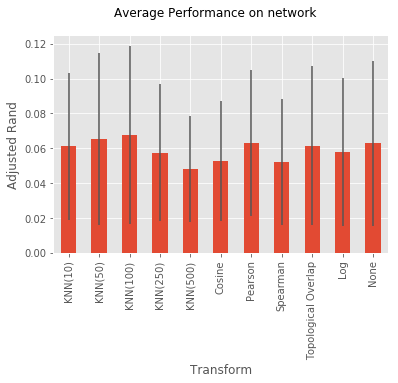

In [41]:
g = res[(res.cluster_alg == 'Louvain') & (res.test_size == 1000)].groupby(['transform']).agg({'adjusted_rand': [np.mean, np.std]})
g.columns = g.columns.droplevel(0)
#order = ['KNN(%d)' % s for s in 10,50,100,250,500,1000] + \
order = ['KNN(%d)' % s for s in 10,50,100, 250, 500] + \
            ['Cosine', 'Pearson', 'Spearman', 'Topological Overlap', 'Log', 'None']
g = g.transpose()[order].transpose()

g.plot.bar(y='mean', yerr='std')
plt.legend().remove()
plt.suptitle("Average Performance on network")
plt.ylabel("Adjusted Rand")
plt.xlabel("Transform")
plt.show()

In [43]:
res = read_csv('../clustering_tests/gobp_clustering.tsv')
#res['cutoff'] = [float(re.search('Cutoff\((.+)\)', t).group(1)) for t in res['transform']]
res['transform'] = [t.split('>')[0].strip() for t in res['transform']]
res['test_size'] = [int(t.split(' ')[2]) for t in res['test_case']]

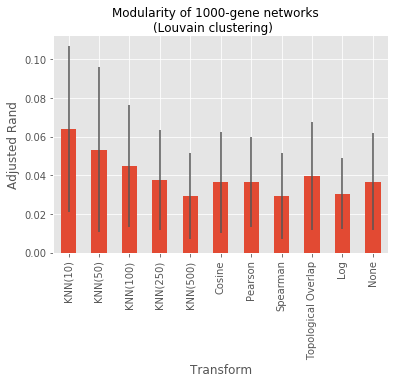

In [100]:
g = res[(res.cluster_alg == 'Louvain') & (res.test_size == 1000)].groupby(['transform']).agg({'adjusted_rand': [np.mean, np.std]})
g.columns = g.columns.droplevel(0)
#order = ['KNN(%d)' % s for s in 10,50,100,250,500,1000] + \
order = ['KNN(%d)' % s for s in 10,50,100, 250, 500] + \
            ['Cosine', 'Pearson', 'Spearman', 'Topological Overlap', 'Log', 'None']
g = g.transpose()[order].transpose()

g.plot.bar(y='mean', yerr='std')
plt.legend().remove()
plt.suptitle("Modularity of 1000-gene networks\n(Louvain clustering) ")
plt.ylabel("Adjusted Rand")
plt.xlabel("Transform")
plt.show()

In [29]:
res = read_csv('../clustering_tests/')
res['cutoff'] = [float(re.search('Cutoff\((.+)\)', t).group(1)) for t in res['transform']]
res['transform'] = [t.split('>')[0].strip() for t in res['transform']]
res['test_size'] = [int(t.split(' ')[0]) for t in res['test_case']]

In [ ]:
res.mo

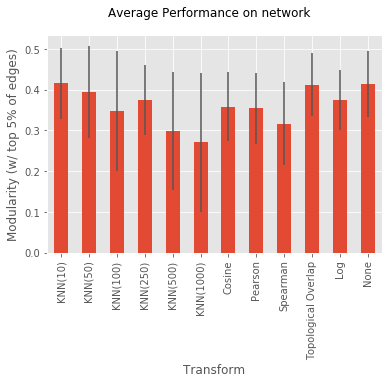

In [99]:
g = res[res.cluster_alg == 'Louvain'].groupby(['transform']).agg({'modularity_cutoff': [np.mean, np.std]})
#g = res.groupby(['transform']).agg({'modularity_cutoff': [np.mean, np.std]})
g.columns = g.columns.droplevel(0)
#order = ['KNN(%d)' % s for s in 10,50,100,250,500,1000] + \
order = ['KNN(%d)' % s for s in 10,50, 100, 250, 500, 1000] + \
            ['Cosine', 'Pearson', 'Spearman', 'Topological Overlap', 'Log', 'None']
g = g.transpose()[order].transpose()

g.plot.bar(y='mean', yerr='std')
plt.legend().remove()
plt.suptitle("Average Performance on network")
plt.ylabel("Modularity (w/ top 5% of edges)")
plt.xlabel("Transform")
plt.show()

In [ ]:
x = read_csv('../preprocessing_tests/semantic_random.tsv')

f = pd.DataFrame(x[(x.similarity_measure == 'Semantic Density')  &
                       (x.cutoff_percentile == 95) &
                       (x.term_type == 'BP')]).reset_index()
g = f.groupby(['transform']).agg({'fold_enrichment':[np.mean, np.std]})
g.columns = g.columns.droplevel(0)
order = ['KNN(%d)' % s for s in 10,50,100,250,500,1000] + \
            ['Cosine', 'Pearson', 'Spearman', 'Topological Overlap', 'Log', 'None']
g = g.transpose()[order].transpose()

g.plot.bar(y='mean', yerr='std')
plt.legend().remove()
plt.suptitle("Enrichment of strong semantic similarity in top 5% of weights\n(Random Networks)")
plt.ylabel("Fold Enrichment")
plt.xlabel("Transform")
plt.show()

# Performance relative to Louvain Clustering

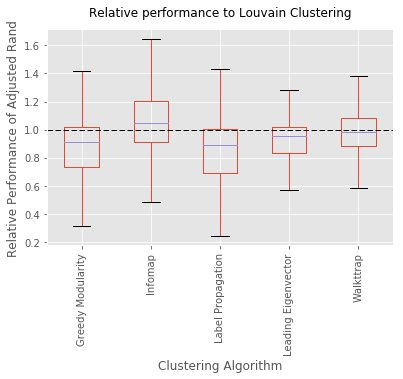

In [132]:
x = pd.DataFrame(res_cutoff[res_cutoff.cluster_alg.isin(cluster_order)])
columns = ['test_case','test_number', 'transform', 'adjusted_rand']
y = pd.DataFrame(x[x.cluster_alg == 'Louvain'][columns])
y = y.rename(columns={'adjusted_rand':'louvain_rand'})
x = pd.merge(x, y, on=['test_case', 'test_number', 'transform'])
x['relative_rand'] = x['adjusted_rand']/x['louvain_rand']
x[x.cluster_alg != 'Louvain'].boxplot(column='relative_rand', by='cluster_alg', showfliers=False)
plt.xticks(rotation=90)
plt.title("")
plt.suptitle("Relative performance to Louvain Clustering")
plt.xlabel("Clustering Algorithm")
plt.ylabel("Relative Performance of Adjusted Rand")
plt.axhline(1, color='black', linewidth=1, ls='--')
plt.show()


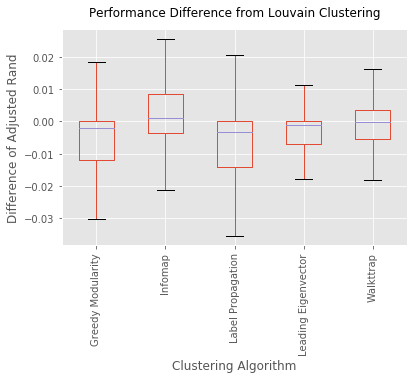

In [158]:
x = pd.DataFrame(res_cutoff[res_cutoff.cluster_alg.isin(cluster_order)])
columns = ['test_case','test_number', 'transform', 'adjusted_rand']
y = pd.DataFrame(x[x.cluster_alg == 'Louvain'][columns])
y = y.rename(columns={'adjusted_rand':'louvain_rand'})
x = pd.merge(x, y, on=['test_case', 'test_number', 'transform'])
x['relative_rand'] = x['adjusted_rand'] - x['louvain_rand']
x[x.cluster_alg != 'Louvain'].boxplot(column='relative_rand', by='cluster_alg', showfliers=False)
plt.xticks(rotation=90)
plt.title("")
plt.suptitle("Performance Difference from Louvain Clustering")
plt.xlabel("Clustering Algorithm")
plt.ylabel("Difference of Adjusted Rand")
plt.show()


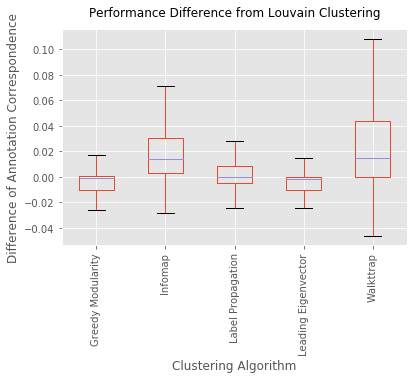

In [177]:
x = pd.DataFrame(res_cutoff[res_cutoff.cluster_alg.isin(cluster_order)])
columns = ['test_case','test_number', 'transform', 'annotation_correspondence']
y = pd.DataFrame(x[x.cluster_alg == 'Louvain'][columns])
y = y.rename(columns={'annotation_correspondence':'louvain_correspondence'})
x = pd.merge(x, y, on=['test_case', 'test_number', 'transform'])
x['relative'] = x['annotation_correspondence'] - x['louvain_correspondence']
x[x.cluster_alg != 'Louvain'].boxplot(column='relative', by='cluster_alg', showfliers=False)
plt.xticks(rotation=90)
plt.title("")
plt.suptitle("Performance Difference from Louvain Clustering")
plt.xlabel("Clustering Algorithm")
plt.ylabel("Difference of Annotation Correspondence")
plt.show()


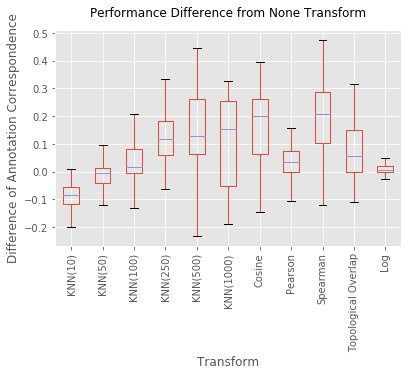

In [183]:
x = pd.DataFrame(res_cutoff[res_cutoff.cluster_alg.isin(cluster_order)])# &
                           #(res_cutoff.cluster_alg == 'Louvain')])
columns = ['test_case','test_number', 'cluster_alg', 'annotation_correspondence']
y = pd.DataFrame(x[x.transform == 'None'][columns])

y = y.rename(columns={'annotation_correspondence':'louvain_correspondence'})
x = pd.merge(x, y, on=['test_case', 'test_number', 'cluster_alg'])
x['relative'] = x['annotation_correspondence'] - x['louvain_correspondence']
x['transform_index'] = [transform_order().index(t) for t in x.transform]
x[x.transform != 'None' ].boxplot(column='relative', by='transform_index', showfliers=False)
plt.xticks(rotation=90)
plt.title("")
plt.suptitle("Performance Difference from None Transform")
plt.xlabel("Transform")
plt.ylabel("Difference of Annotation Correspondence")
plt.gca().set_xticklabels([t for t in transform_order() if t != 'None'])
plt.show()

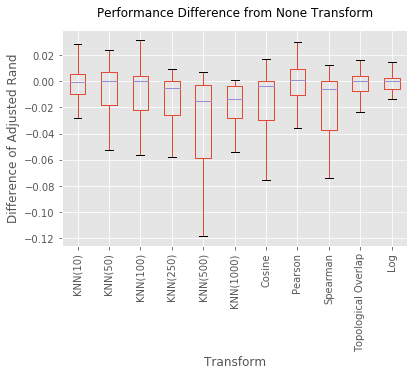

In [184]:
x = pd.DataFrame(res_cutoff[res_cutoff.cluster_alg.isin(cluster_order) &
                           (res_cutoff.cluster_alg == 'Louvain')])
columns = ['test_case','test_number', 'cluster_alg', 'adjusted_rand']
y = pd.DataFrame(x[x.transform == 'None'][columns])
y = y.rename(columns={'adjusted_rand':'none_rand'})
x = pd.merge(x, y, on=['test_case', 'test_number', 'cluster_alg'])
x['relative_rand'] = x['adjusted_rand'] - x['none_rand']
x['transform_index'] = [transform_order().index(t) for t in x.transform]


x[x.transform != 'None' ].boxplot(column='relative_rand', by='transform_index', showfliers=False)
plt.xticks(rotation=90)
plt.title("")
plt.suptitle("Performance Difference from None Transform")
plt.xlabel("Transform")
plt.ylabel("Difference of Adjusted Rand")
plt.gca().set_xticklabels([t for t in transform_order() if t != 'None'])
plt.show()

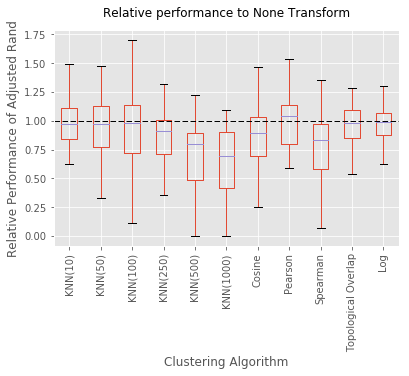

In [143]:
x = pd.DataFrame(res_cutoff[res_cutoff.cluster_alg.isin(cluster_order) &
                           (res_cutoff.cluster_alg == 'Louvain')])
columns = ['test_case','test_number', 'cluster_alg', 'adjusted_rand']
y = pd.DataFrame(x[x.transform == 'None'][columns])
y = y.rename(columns={'adjusted_rand':'none_rand'})
x = pd.merge(x, y, on=['test_case', 'test_number', 'cluster_alg'])
x['relative_rand'] = x['adjusted_rand']/x['none_rand']
x['transform_index'] = [transform_order().index(t) for t in x.transform]


x[x.transform != 'None' ].boxplot(column='relative_rand', by='transform_index', showfliers=False)
plt.xticks(rotation=90)
plt.title("")
plt.suptitle("Relative performance to None Transform")
plt.xlabel("Clustering Algorithm")
plt.ylabel("Relative Performance of Adjusted Rand")
plt.axhline(1, color='black', linewidth=1, ls='--')
plt.gca().set_xticklabels([t for t in transform_order() if t != 'None'])
plt.show()
